In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your CSV files for 0.25 models (standard and quantized)
csv_files = [
    '../data/mobileNet_224/0_25/standard/mobilnet_224_0_25_STD_h7.csv',
    '../data/mobileNet_224/0_50/std/mobilenet_224_0_5_STD.csv',
    '../data/mobileNet_224/0_75/std/mobilenet_224_0_75_std.csv',
    '../data/mobileNet_224/1_0/standard/mobilenet_224_1_std.csv'
]

# Load CSV files into DataFrames
dfs = [pd.read_csv(file, delimiter=',') for file in csv_files]

# Function to filter and extract relevant data
def filter_and_extract(df, board, optimization):
    filtered = df[(df["board"] == board) & (df["optimization"] == optimization)]
    return filtered[["rom_n_macc", "duration_ms"]]

# Filter and extract data for STM32H7S78-DK and model 0.25 std/quant for each optimization
filtered_data = {opt: pd.DataFrame() for opt in ['balanced', 'ram', 'time']}

optimizations = ['balanced', 'ram', 'time']

for opt in optimizations:
    combined_data = pd.concat([filter_and_extract(df, 'STM32H7S78-DK', opt) for df in dfs])
    filtered_data[opt] = combined_data



In [124]:
# Define paths to your CSV files for 0.25 models (standard and quantized)
csv_files2 = [
    '../data/mobileNet_224/0_25/qtzReal/mobilenet_0_25_224_qtz_H7.csv',
    '../data/mobileNet_224/0_50/qtz/mobilenet_224_0_5_qtz.csv',
    '../data/mobileNet_224/0_75/qtz/mobilenet_224_0_75_qtz.csv',
    '../data/mobileNet_224/1_0/quantized/mobilenet_224_1_qtz.csv'
]

# Load CSV files into DataFrames
dfs2 = [pd.read_csv(file, delimiter=',') for file in csv_files2]

# Filter and extract data for STM32H7S78-DK and model 0.25 std/quant for each optimization
filtered_data2 = {opt: pd.DataFrame() for opt in ['balanced', 'ram', 'time']}

optimizations = ['balanced', 'ram', 'time']

for opt in optimizations:
    combined_data2 = pd.concat([filter_and_extract(df2, 'STM32H7S78-DK', opt) for df2 in dfs2])
    filtered_data2[opt] = combined_data2


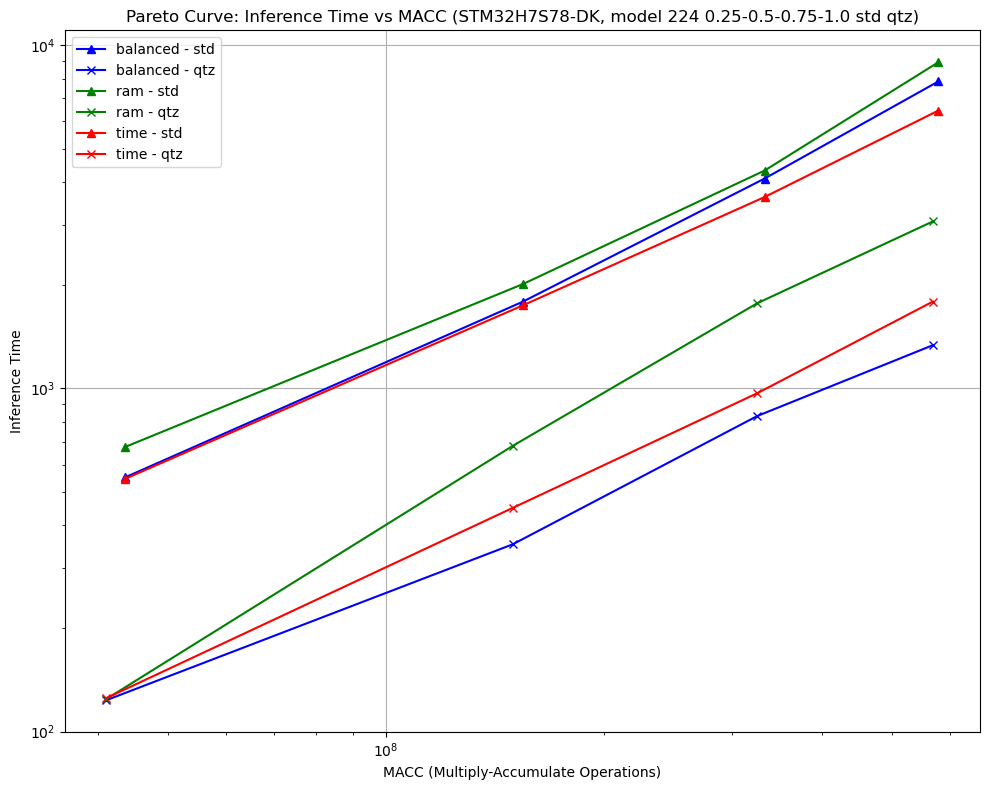

In [127]:
# Plot Pareto curves for each optimization category
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']
markers = ['^', 'x']
labels = ['balanced - std', 'ram - std', 'time - std', 'balanced - qtz', 'ram - qtz', 'time - qtz']


# Plot lines and markers for each optimization
for i, opt in enumerate(optimizations):
    data_sorted = filtered_data[opt].sort_values(by='rom_n_macc')  # Sort data by 'rom_n_macc'
    data_sorted2 = filtered_data2[opt].sort_values(by='rom_n_macc')  # Sort data by 'rom_n_macc'
    plt.plot(data_sorted['rom_n_macc'], data_sorted['duration_ms'], 
             color=colors[i], marker=markers[0], linestyle='-', label=labels[i])
    plt.plot(data_sorted2['rom_n_macc'], data_sorted2['duration_ms'], 
             color=colors[i], marker=markers[1], linestyle='-', label=labels[i+len(optimizations)])

plt.xlabel('MACC (Multiply-Accumulate Operations)')
plt.ylabel('Inference Time')
plt.title('Pareto Curve: Inference Time vs MACC (STM32H7S78-DK, model 224 0.25-0.5-0.75-1.0 std qtz)')
plt.xscale('log')  # Use log scale for MACC
plt.yscale('log')  # Use log scale for ROM
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()